In [46]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";

# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";

In [47]:
from glob import glob
from skimage import feature
import matplotlib.pyplot as plt
from sklearn import preprocessing
from skimage.exposure import histogram
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import resize 
from skimage.io import imread_collection
from sklearn.model_selection import train_test_split
from skimage.feature import local_binary_pattern
import glob
import time
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
import pydicom
import pandas as pd
from skimage.feature import greycomatrix, greycoprops
from skimage.io import imread, imshow, imsave, imread_collection
from tqdm import tqdm
import cv2
%matplotlib inline


In [103]:
path = '/data/flavio/Camila/imagens/images/COVID-19_Radiography_Dataset/Normal/'
image_names = os.listdir(path)
covid = [imread(path+str(name)+'') for name in image_names]
print('The database has {} segmented images'.format(len(covid)))


The database has 10192 segmented images


In [104]:
# Separando o conjunto de imagens 'Benigno' em 70% Treino e 30% Teste
benigno_treino_70, benigno_teste_30 = train_test_split(covid, test_size=0.3)
# Separando o conjunto de imagens 'Maligno' em 70% Treino e 30% Teste
#maligno_treino_70, maligno_teste_30 = train_test_split(normal, test_size=0.3)

In [105]:
print('Benigno Treino 70%: ', len(benigno_treino_70))
#print('Maligno Treino 70%: ', len(maligno_treino_70))
print('Benigno Teste 30%: ', len(benigno_teste_30))
#print('Maligno Teste 30%: ', len(maligno_teste_30))

Benigno Treino 70%:  7134
Benigno Teste 30%:  3058


In [113]:
lbp = []
hist = []
for i, img in enumerate(benigno_teste_30):
    lbp.append(feature.local_binary_pattern(img, 10, 1, method="default"))
    histFeat, bin_edges = np.histogram(lbp[i], range(256), density=True)
    hist.append(histFeat)

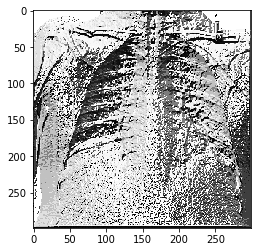

In [114]:
plt.imshow(lbp[0], cmap='gray')

In [115]:
#matriz = cria_matrix(tam)
matriz = []
target = []
    #Aplicacao na base maligna
for i, image in enumerate(hist):
    matriz.append(image)
    target.append(1)
    print("terminou base imagens")

    # converter lista para np.array
    matriz_glcm = np.array(matriz)
    classe_glcm = np.array(target)
    #print(x.shape)
    #Juntar o X com o Y
    matriz_saida = np.zeros((matriz_glcm.shape[0], matriz_glcm.shape[1]+1))
    matriz_saida[0:,:-1] = matriz_glcm
    matriz_saida[0:,-1] = classe_glcm.reshape(-1)
    print('Shape: ', classe_glcm.shape)
    print('Shape matriz: ', matriz_saida.shape)
 

terminou base imagens
Shape:  (1,)
Shape matriz:  (1, 256)
terminou base imagens
Shape:  (2,)
Shape matriz:  (2, 256)
terminou base imagens
Shape:  (3,)
Shape matriz:  (3, 256)
terminou base imagens
Shape:  (4,)
Shape matriz:  (4, 256)
terminou base imagens
Shape:  (5,)
Shape matriz:  (5, 256)
terminou base imagens
Shape:  (6,)
Shape matriz:  (6, 256)
terminou base imagens
Shape:  (7,)
Shape matriz:  (7, 256)
terminou base imagens
Shape:  (8,)
Shape matriz:  (8, 256)
terminou base imagens
Shape:  (9,)
Shape matriz:  (9, 256)
terminou base imagens
Shape:  (10,)
Shape matriz:  (10, 256)
terminou base imagens
Shape:  (11,)
Shape matriz:  (11, 256)
terminou base imagens
Shape:  (12,)
Shape matriz:  (12, 256)
terminou base imagens
Shape:  (13,)
Shape matriz:  (13, 256)
terminou base imagens
Shape:  (14,)
Shape matriz:  (14, 256)
terminou base imagens
Shape:  (15,)
Shape matriz:  (15, 256)
terminou base imagens
Shape:  (16,)
Shape matriz:  (16, 256)
terminou base imagens
Shape:  (17,)
Shape 

Shape:  (294,)
Shape matriz:  (294, 256)
terminou base imagens
Shape:  (295,)
Shape matriz:  (295, 256)
terminou base imagens
Shape:  (296,)
Shape matriz:  (296, 256)
terminou base imagens
Shape:  (297,)
Shape matriz:  (297, 256)
terminou base imagens
Shape:  (298,)
Shape matriz:  (298, 256)
terminou base imagens
Shape:  (299,)
Shape matriz:  (299, 256)
terminou base imagens
Shape:  (300,)
Shape matriz:  (300, 256)
terminou base imagens
Shape:  (301,)
Shape matriz:  (301, 256)
terminou base imagens
Shape:  (302,)
Shape matriz:  (302, 256)
terminou base imagens
Shape:  (303,)
Shape matriz:  (303, 256)
terminou base imagens
Shape:  (304,)
Shape matriz:  (304, 256)
terminou base imagens
Shape:  (305,)
Shape matriz:  (305, 256)
terminou base imagens
Shape:  (306,)
Shape matriz:  (306, 256)
terminou base imagens
Shape:  (307,)
Shape matriz:  (307, 256)
terminou base imagens
Shape:  (308,)
Shape matriz:  (308, 256)
terminou base imagens
Shape:  (309,)
Shape matriz:  (309, 256)
terminou base 

Shape:  (519,)
Shape matriz:  (519, 256)
terminou base imagens
Shape:  (520,)
Shape matriz:  (520, 256)
terminou base imagens
Shape:  (521,)
Shape matriz:  (521, 256)
terminou base imagens
Shape:  (522,)
Shape matriz:  (522, 256)
terminou base imagens
Shape:  (523,)
Shape matriz:  (523, 256)
terminou base imagens
Shape:  (524,)
Shape matriz:  (524, 256)
terminou base imagens
Shape:  (525,)
Shape matriz:  (525, 256)
terminou base imagens
Shape:  (526,)
Shape matriz:  (526, 256)
terminou base imagens
Shape:  (527,)
Shape matriz:  (527, 256)
terminou base imagens
Shape:  (528,)
Shape matriz:  (528, 256)
terminou base imagens
Shape:  (529,)
Shape matriz:  (529, 256)
terminou base imagens
Shape:  (530,)
Shape matriz:  (530, 256)
terminou base imagens
Shape:  (531,)
Shape matriz:  (531, 256)
terminou base imagens
Shape:  (532,)
Shape matriz:  (532, 256)
terminou base imagens
Shape:  (533,)
Shape matriz:  (533, 256)
terminou base imagens
Shape:  (534,)
Shape matriz:  (534, 256)
terminou base 

Shape:  (700,)
Shape matriz:  (700, 256)
terminou base imagens
Shape:  (701,)
Shape matriz:  (701, 256)
terminou base imagens
Shape:  (702,)
Shape matriz:  (702, 256)
terminou base imagens
Shape:  (703,)
Shape matriz:  (703, 256)
terminou base imagens
Shape:  (704,)
Shape matriz:  (704, 256)
terminou base imagens
Shape:  (705,)
Shape matriz:  (705, 256)
terminou base imagens
Shape:  (706,)
Shape matriz:  (706, 256)
terminou base imagens
Shape:  (707,)
Shape matriz:  (707, 256)
terminou base imagens
Shape:  (708,)
Shape matriz:  (708, 256)
terminou base imagens
Shape:  (709,)
Shape matriz:  (709, 256)
terminou base imagens
Shape:  (710,)
Shape matriz:  (710, 256)
terminou base imagens
Shape:  (711,)
Shape matriz:  (711, 256)
terminou base imagens
Shape:  (712,)
Shape matriz:  (712, 256)
terminou base imagens
Shape:  (713,)
Shape matriz:  (713, 256)
terminou base imagens
Shape:  (714,)
Shape matriz:  (714, 256)
terminou base imagens
Shape:  (715,)
Shape matriz:  (715, 256)
terminou base 

Shape:  (845,)
Shape matriz:  (845, 256)
terminou base imagens
Shape:  (846,)
Shape matriz:  (846, 256)
terminou base imagens
Shape:  (847,)
Shape matriz:  (847, 256)
terminou base imagens
Shape:  (848,)
Shape matriz:  (848, 256)
terminou base imagens
Shape:  (849,)
Shape matriz:  (849, 256)
terminou base imagens
Shape:  (850,)
Shape matriz:  (850, 256)
terminou base imagens
Shape:  (851,)
Shape matriz:  (851, 256)
terminou base imagens
Shape:  (852,)
Shape matriz:  (852, 256)
terminou base imagens
Shape:  (853,)
Shape matriz:  (853, 256)
terminou base imagens
Shape:  (854,)
Shape matriz:  (854, 256)
terminou base imagens
Shape:  (855,)
Shape matriz:  (855, 256)
terminou base imagens
Shape:  (856,)
Shape matriz:  (856, 256)
terminou base imagens
Shape:  (857,)
Shape matriz:  (857, 256)
terminou base imagens
Shape:  (858,)
Shape matriz:  (858, 256)
terminou base imagens
Shape:  (859,)
Shape matriz:  (859, 256)
terminou base imagens
Shape:  (860,)
Shape matriz:  (860, 256)
terminou base 

Shape:  (1092,)
Shape matriz:  (1092, 256)
terminou base imagens
Shape:  (1093,)
Shape matriz:  (1093, 256)
terminou base imagens
Shape:  (1094,)
Shape matriz:  (1094, 256)
terminou base imagens
Shape:  (1095,)
Shape matriz:  (1095, 256)
terminou base imagens
Shape:  (1096,)
Shape matriz:  (1096, 256)
terminou base imagens
Shape:  (1097,)
Shape matriz:  (1097, 256)
terminou base imagens
Shape:  (1098,)
Shape matriz:  (1098, 256)
terminou base imagens
Shape:  (1099,)
Shape matriz:  (1099, 256)
terminou base imagens
Shape:  (1100,)
Shape matriz:  (1100, 256)
terminou base imagens
Shape:  (1101,)
Shape matriz:  (1101, 256)
terminou base imagens
Shape:  (1102,)
Shape matriz:  (1102, 256)
terminou base imagens
Shape:  (1103,)
Shape matriz:  (1103, 256)
terminou base imagens
Shape:  (1104,)
Shape matriz:  (1104, 256)
terminou base imagens
Shape:  (1105,)
Shape matriz:  (1105, 256)
terminou base imagens
Shape:  (1106,)
Shape matriz:  (1106, 256)
terminou base imagens
Shape:  (1107,)
Shape mat

Shape:  (1300,)
Shape matriz:  (1300, 256)
terminou base imagens
Shape:  (1301,)
Shape matriz:  (1301, 256)
terminou base imagens
Shape:  (1302,)
Shape matriz:  (1302, 256)
terminou base imagens
Shape:  (1303,)
Shape matriz:  (1303, 256)
terminou base imagens
Shape:  (1304,)
Shape matriz:  (1304, 256)
terminou base imagens
Shape:  (1305,)
Shape matriz:  (1305, 256)
terminou base imagens
Shape:  (1306,)
Shape matriz:  (1306, 256)
terminou base imagens
Shape:  (1307,)
Shape matriz:  (1307, 256)
terminou base imagens
Shape:  (1308,)
Shape matriz:  (1308, 256)
terminou base imagens
Shape:  (1309,)
Shape matriz:  (1309, 256)
terminou base imagens
Shape:  (1310,)
Shape matriz:  (1310, 256)
terminou base imagens
Shape:  (1311,)
Shape matriz:  (1311, 256)
terminou base imagens
Shape:  (1312,)
Shape matriz:  (1312, 256)
terminou base imagens
Shape:  (1313,)
Shape matriz:  (1313, 256)
terminou base imagens
Shape:  (1314,)
Shape matriz:  (1314, 256)
terminou base imagens
Shape:  (1315,)
Shape mat

Shape:  (1486,)
Shape matriz:  (1486, 256)
terminou base imagens
Shape:  (1487,)
Shape matriz:  (1487, 256)
terminou base imagens
Shape:  (1488,)
Shape matriz:  (1488, 256)
terminou base imagens
Shape:  (1489,)
Shape matriz:  (1489, 256)
terminou base imagens
Shape:  (1490,)
Shape matriz:  (1490, 256)
terminou base imagens
Shape:  (1491,)
Shape matriz:  (1491, 256)
terminou base imagens
Shape:  (1492,)
Shape matriz:  (1492, 256)
terminou base imagens
Shape:  (1493,)
Shape matriz:  (1493, 256)
terminou base imagens
Shape:  (1494,)
Shape matriz:  (1494, 256)
terminou base imagens
Shape:  (1495,)
Shape matriz:  (1495, 256)
terminou base imagens
Shape:  (1496,)
Shape matriz:  (1496, 256)
terminou base imagens
Shape:  (1497,)
Shape matriz:  (1497, 256)
terminou base imagens
Shape:  (1498,)
Shape matriz:  (1498, 256)
terminou base imagens
Shape:  (1499,)
Shape matriz:  (1499, 256)
terminou base imagens
Shape:  (1500,)
Shape matriz:  (1500, 256)
terminou base imagens
Shape:  (1501,)
Shape mat

Shape:  (1657,)
Shape matriz:  (1657, 256)
terminou base imagens
Shape:  (1658,)
Shape matriz:  (1658, 256)
terminou base imagens
Shape:  (1659,)
Shape matriz:  (1659, 256)
terminou base imagens
Shape:  (1660,)
Shape matriz:  (1660, 256)
terminou base imagens
Shape:  (1661,)
Shape matriz:  (1661, 256)
terminou base imagens
Shape:  (1662,)
Shape matriz:  (1662, 256)
terminou base imagens
Shape:  (1663,)
Shape matriz:  (1663, 256)
terminou base imagens
Shape:  (1664,)
Shape matriz:  (1664, 256)
terminou base imagens
Shape:  (1665,)
Shape matriz:  (1665, 256)
terminou base imagens
Shape:  (1666,)
Shape matriz:  (1666, 256)
terminou base imagens
Shape:  (1667,)
Shape matriz:  (1667, 256)
terminou base imagens
Shape:  (1668,)
Shape matriz:  (1668, 256)
terminou base imagens
Shape:  (1669,)
Shape matriz:  (1669, 256)
terminou base imagens
Shape:  (1670,)
Shape matriz:  (1670, 256)
terminou base imagens
Shape:  (1671,)
Shape matriz:  (1671, 256)
terminou base imagens
Shape:  (1672,)
Shape mat

Shape:  (1817,)
Shape matriz:  (1817, 256)
terminou base imagens
Shape:  (1818,)
Shape matriz:  (1818, 256)
terminou base imagens
Shape:  (1819,)
Shape matriz:  (1819, 256)
terminou base imagens
Shape:  (1820,)
Shape matriz:  (1820, 256)
terminou base imagens
Shape:  (1821,)
Shape matriz:  (1821, 256)
terminou base imagens
Shape:  (1822,)
Shape matriz:  (1822, 256)
terminou base imagens
Shape:  (1823,)
Shape matriz:  (1823, 256)
terminou base imagens
Shape:  (1824,)
Shape matriz:  (1824, 256)
terminou base imagens
Shape:  (1825,)
Shape matriz:  (1825, 256)
terminou base imagens
Shape:  (1826,)
Shape matriz:  (1826, 256)
terminou base imagens
Shape:  (1827,)
Shape matriz:  (1827, 256)
terminou base imagens
Shape:  (1828,)
Shape matriz:  (1828, 256)
terminou base imagens
Shape:  (1829,)
Shape matriz:  (1829, 256)
terminou base imagens
Shape:  (1830,)
Shape matriz:  (1830, 256)
terminou base imagens
Shape:  (1831,)
Shape matriz:  (1831, 256)
terminou base imagens
Shape:  (1832,)
Shape mat

Shape:  (1969,)
Shape matriz:  (1969, 256)
terminou base imagens
Shape:  (1970,)
Shape matriz:  (1970, 256)
terminou base imagens
Shape:  (1971,)
Shape matriz:  (1971, 256)
terminou base imagens
Shape:  (1972,)
Shape matriz:  (1972, 256)
terminou base imagens
Shape:  (1973,)
Shape matriz:  (1973, 256)
terminou base imagens
Shape:  (1974,)
Shape matriz:  (1974, 256)
terminou base imagens
Shape:  (1975,)
Shape matriz:  (1975, 256)
terminou base imagens
Shape:  (1976,)
Shape matriz:  (1976, 256)
terminou base imagens
Shape:  (1977,)
Shape matriz:  (1977, 256)
terminou base imagens
Shape:  (1978,)
Shape matriz:  (1978, 256)
terminou base imagens
Shape:  (1979,)
Shape matriz:  (1979, 256)
terminou base imagens
Shape:  (1980,)
Shape matriz:  (1980, 256)
terminou base imagens
Shape:  (1981,)
Shape matriz:  (1981, 256)
terminou base imagens
Shape:  (1982,)
Shape matriz:  (1982, 256)
terminou base imagens
Shape:  (1983,)
Shape matriz:  (1983, 256)
terminou base imagens
Shape:  (1984,)
Shape mat

Shape:  (2112,)
Shape matriz:  (2112, 256)
terminou base imagens
Shape:  (2113,)
Shape matriz:  (2113, 256)
terminou base imagens
Shape:  (2114,)
Shape matriz:  (2114, 256)
terminou base imagens
Shape:  (2115,)
Shape matriz:  (2115, 256)
terminou base imagens
Shape:  (2116,)
Shape matriz:  (2116, 256)
terminou base imagens
Shape:  (2117,)
Shape matriz:  (2117, 256)
terminou base imagens
Shape:  (2118,)
Shape matriz:  (2118, 256)
terminou base imagens
Shape:  (2119,)
Shape matriz:  (2119, 256)
terminou base imagens
Shape:  (2120,)
Shape matriz:  (2120, 256)
terminou base imagens
Shape:  (2121,)
Shape matriz:  (2121, 256)
terminou base imagens
Shape:  (2122,)
Shape matriz:  (2122, 256)
terminou base imagens
Shape:  (2123,)
Shape matriz:  (2123, 256)
terminou base imagens
Shape:  (2124,)
Shape matriz:  (2124, 256)
terminou base imagens
Shape:  (2125,)
Shape matriz:  (2125, 256)
terminou base imagens
Shape:  (2126,)
Shape matriz:  (2126, 256)
terminou base imagens
Shape:  (2127,)
Shape mat

Shape:  (2249,)
Shape matriz:  (2249, 256)
terminou base imagens
Shape:  (2250,)
Shape matriz:  (2250, 256)
terminou base imagens
Shape:  (2251,)
Shape matriz:  (2251, 256)
terminou base imagens
Shape:  (2252,)
Shape matriz:  (2252, 256)
terminou base imagens
Shape:  (2253,)
Shape matriz:  (2253, 256)
terminou base imagens
Shape:  (2254,)
Shape matriz:  (2254, 256)
terminou base imagens
Shape:  (2255,)
Shape matriz:  (2255, 256)
terminou base imagens
Shape:  (2256,)
Shape matriz:  (2256, 256)
terminou base imagens
Shape:  (2257,)
Shape matriz:  (2257, 256)
terminou base imagens
Shape:  (2258,)
Shape matriz:  (2258, 256)
terminou base imagens
Shape:  (2259,)
Shape matriz:  (2259, 256)
terminou base imagens
Shape:  (2260,)
Shape matriz:  (2260, 256)
terminou base imagens
Shape:  (2261,)
Shape matriz:  (2261, 256)
terminou base imagens
Shape:  (2262,)
Shape matriz:  (2262, 256)
terminou base imagens
Shape:  (2263,)
Shape matriz:  (2263, 256)
terminou base imagens
Shape:  (2264,)
Shape mat

Shape:  (2380,)
Shape matriz:  (2380, 256)
terminou base imagens
Shape:  (2381,)
Shape matriz:  (2381, 256)
terminou base imagens
Shape:  (2382,)
Shape matriz:  (2382, 256)
terminou base imagens
Shape:  (2383,)
Shape matriz:  (2383, 256)
terminou base imagens
Shape:  (2384,)
Shape matriz:  (2384, 256)
terminou base imagens
Shape:  (2385,)
Shape matriz:  (2385, 256)
terminou base imagens
Shape:  (2386,)
Shape matriz:  (2386, 256)
terminou base imagens
Shape:  (2387,)
Shape matriz:  (2387, 256)
terminou base imagens
Shape:  (2388,)
Shape matriz:  (2388, 256)
terminou base imagens
Shape:  (2389,)
Shape matriz:  (2389, 256)
terminou base imagens
Shape:  (2390,)
Shape matriz:  (2390, 256)
terminou base imagens
Shape:  (2391,)
Shape matriz:  (2391, 256)
terminou base imagens
Shape:  (2392,)
Shape matriz:  (2392, 256)
terminou base imagens
Shape:  (2393,)
Shape matriz:  (2393, 256)
terminou base imagens
Shape:  (2394,)
Shape matriz:  (2394, 256)
terminou base imagens
Shape:  (2395,)
Shape mat

Shape matriz:  (2564, 256)
terminou base imagens
Shape:  (2565,)
Shape matriz:  (2565, 256)
terminou base imagens
Shape:  (2566,)
Shape matriz:  (2566, 256)
terminou base imagens
Shape:  (2567,)
Shape matriz:  (2567, 256)
terminou base imagens
Shape:  (2568,)
Shape matriz:  (2568, 256)
terminou base imagens
Shape:  (2569,)
Shape matriz:  (2569, 256)
terminou base imagens
Shape:  (2570,)
Shape matriz:  (2570, 256)
terminou base imagens
Shape:  (2571,)
Shape matriz:  (2571, 256)
terminou base imagens
Shape:  (2572,)
Shape matriz:  (2572, 256)
terminou base imagens
Shape:  (2573,)
Shape matriz:  (2573, 256)
terminou base imagens
Shape:  (2574,)
Shape matriz:  (2574, 256)
terminou base imagens
Shape:  (2575,)
Shape matriz:  (2575, 256)
terminou base imagens
Shape:  (2576,)
Shape matriz:  (2576, 256)
terminou base imagens
Shape:  (2577,)
Shape matriz:  (2577, 256)
terminou base imagens
Shape:  (2578,)
Shape matriz:  (2578, 256)
terminou base imagens
Shape:  (2579,)
Shape matriz:  (2579, 256

Shape:  (2738,)
Shape matriz:  (2738, 256)
terminou base imagens
Shape:  (2739,)
Shape matriz:  (2739, 256)
terminou base imagens
Shape:  (2740,)
Shape matriz:  (2740, 256)
terminou base imagens
Shape:  (2741,)
Shape matriz:  (2741, 256)
terminou base imagens
Shape:  (2742,)
Shape matriz:  (2742, 256)
terminou base imagens
Shape:  (2743,)
Shape matriz:  (2743, 256)
terminou base imagens
Shape:  (2744,)
Shape matriz:  (2744, 256)
terminou base imagens
Shape:  (2745,)
Shape matriz:  (2745, 256)
terminou base imagens
Shape:  (2746,)
Shape matriz:  (2746, 256)
terminou base imagens
Shape:  (2747,)
Shape matriz:  (2747, 256)
terminou base imagens
Shape:  (2748,)
Shape matriz:  (2748, 256)
terminou base imagens
Shape:  (2749,)
Shape matriz:  (2749, 256)
terminou base imagens
Shape:  (2750,)
Shape matriz:  (2750, 256)
terminou base imagens
Shape:  (2751,)
Shape matriz:  (2751, 256)
terminou base imagens
Shape:  (2752,)
Shape matriz:  (2752, 256)
terminou base imagens
Shape:  (2753,)
Shape mat

Shape:  (2903,)
Shape matriz:  (2903, 256)
terminou base imagens
Shape:  (2904,)
Shape matriz:  (2904, 256)
terminou base imagens
Shape:  (2905,)
Shape matriz:  (2905, 256)
terminou base imagens
Shape:  (2906,)
Shape matriz:  (2906, 256)
terminou base imagens
Shape:  (2907,)
Shape matriz:  (2907, 256)
terminou base imagens
Shape:  (2908,)
Shape matriz:  (2908, 256)
terminou base imagens
Shape:  (2909,)
Shape matriz:  (2909, 256)
terminou base imagens
Shape:  (2910,)
Shape matriz:  (2910, 256)
terminou base imagens
Shape:  (2911,)
Shape matriz:  (2911, 256)
terminou base imagens
Shape:  (2912,)
Shape matriz:  (2912, 256)
terminou base imagens
Shape:  (2913,)
Shape matriz:  (2913, 256)
terminou base imagens
Shape:  (2914,)
Shape matriz:  (2914, 256)
terminou base imagens
Shape:  (2915,)
Shape matriz:  (2915, 256)
terminou base imagens
Shape:  (2916,)
Shape matriz:  (2916, 256)
terminou base imagens
Shape:  (2917,)
Shape matriz:  (2917, 256)
terminou base imagens
Shape:  (2918,)
Shape mat

Shape:  (3056,)
Shape matriz:  (3056, 256)
terminou base imagens
Shape:  (3057,)
Shape matriz:  (3057, 256)
terminou base imagens
Shape:  (3058,)
Shape matriz:  (3058, 256)


In [109]:
matriz_saida

array([[9.94063447e-02, 3.01156391e-02, 1.54597737e-03, ...,
        4.32873663e-04, 3.07649496e-02, 1.00000000e+00],
       [9.43109638e-02, 2.77202430e-02, 9.66583817e-04, ...,
        7.93979564e-04, 2.87213477e-02, 1.00000000e+00],
       [8.91850652e-02, 3.36000996e-02, 4.04820478e-04, ...,
        6.85080808e-04, 2.90536543e-02, 1.00000000e+00],
       ...,
       [1.08219816e-01, 3.04459192e-02, 1.39713587e-03, ...,
        6.69460938e-04, 3.01839562e-02, 1.00000000e+00],
       [1.10040927e-01, 3.00027695e-02, 1.63091978e-03, ...,
        6.46213497e-04, 2.55715912e-02, 1.00000000e+00],
       [9.97938391e-02, 2.63527443e-02, 1.76282530e-03, ...,
        7.46959873e-04, 2.40819863e-02, 1.00000000e+00]])

In [116]:
nome_file = '/data/flavio/Camila/csv/lbp/lbp_normal_teste_sseg'
matriz_csv = pd.DataFrame(matriz_saida)

In [117]:
matriz_csv.to_csv(nome_file+'.csv', index=False)

In [118]:
matriz_csv 

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.084341,0.034354,0.000370,0.006007,0.003168,0.000082,0.001810,0.023698,0.001728,0.000082,...,0.000041,0.000123,0.169464,0.003908,0.000041,0.000000,0.048589,0.000823,0.027771,1.0
1,0.099460,0.034451,0.001131,0.009736,0.003141,0.000314,0.003360,0.025375,0.003894,0.000502,...,0.000094,0.000094,0.141229,0.001602,0.000126,0.000126,0.048646,0.000691,0.030149,1.0
2,0.087734,0.030083,0.001272,0.009755,0.003969,0.000333,0.002908,0.022812,0.003605,0.000697,...,0.000091,0.000091,0.191736,0.001606,0.000030,0.000182,0.042473,0.000545,0.024327,1.0
3,0.105012,0.033900,0.000956,0.007442,0.003653,0.000068,0.002902,0.021269,0.004131,0.000376,...,0.000000,0.000034,0.172846,0.002902,0.000000,0.000102,0.052369,0.000751,0.026389,1.0
4,0.087407,0.036502,0.000807,0.009746,0.004532,0.000155,0.003383,0.027191,0.003290,0.000590,...,0.000031,0.000000,0.103455,0.002111,0.000031,0.000124,0.045194,0.000652,0.031164,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.085650,0.030541,0.000800,0.007912,0.002525,0.000216,0.002617,0.025369,0.002678,0.000339,...,0.000062,0.000031,0.179767,0.002586,0.000031,0.000062,0.050676,0.000708,0.032881,1.0
3054,0.083379,0.033751,0.000902,0.008245,0.002705,0.000290,0.002931,0.027245,0.003124,0.000451,...,0.000032,0.000129,0.201443,0.002287,0.000000,0.000129,0.042092,0.000483,0.028147,1.0
3055,0.088486,0.031078,0.000711,0.007592,0.003941,0.000194,0.002488,0.025683,0.003263,0.000323,...,0.000065,0.000000,0.191510,0.003683,0.000032,0.000097,0.051367,0.000711,0.028978,1.0
3056,0.072713,0.023235,0.001361,0.008294,0.002786,0.000158,0.003989,0.019057,0.003324,0.000380,...,0.000032,0.000000,0.205002,0.001266,0.000063,0.000158,0.058753,0.000506,0.021399,1.0
